# COGS 118B - Final Project

# Names


- Minju Lee
- Cynthia Delira
- Ke
- Kevin Su

# Abstract 
Current music recommendation algorithms only offer users vague genres such as pop, rock, or indie. These genres include many different subgenres that are unique from one another which users are left unaware of because algorithms leave them out. We propose incorporating these subgenres and creating a machine learning structure that separates music by subgenres to give users more specific suggestions.

We will be using the Spotify Track Dataset from Kaggle and extract all pop-related songs’ dataset for clustering. Each data will represent a certain aspect of the song such as tempo, energy level, danceability, etc. Since most songs are already labeled with a subgenre of pop that are only based on the origin of the music, we will manual evualation as the main method of measurement for our algorithm. 

# Background

There are multiple music genre algorithms that exist, however none of them correctly classify music into sub-genres. Even the biggest music algorithm Spotify struggles with this as it is unable “to accurately gauge mood and context” <a name="mys"></a>[<sup>[2]</sup>](#mystery) which is crucial to identifying sub-genres. The issue with Spotify is that it utilizes K-Means clustering which requires previous knowledge of the number of clusters to create, making it difficult for the algorithm to identify sub-genres <a name="stern"></a>[<sup>[1]</sup>](#sternNote). Without sub-genres, algorithms cluster music into large, vague groups and end up recommending popular songs/artists instead of niche, underrated music <a name="mys"></a>[<sup>[2]</sup>](#mystery). Classifying music into sub-genres is important as it allows the user to find a wider variety of music and breaks them out of an echo chamber of the same type of music that everyone listens to <a name="mys"></a>[<sup>[2]</sup>](#mystery). 
Instead of K-Means clustering, we propose to use hierarchical clustering which is a “bottom-up” approach that initializes each observation as its own cluster and merged clusters move up the hierarchy. This approach requires no previous knowledge of the cluster count which allows us to evaluate sub-genres and the closeness of any two genres <a name="mys"></a>[<sup>[2]</sup>](#mystery). Our method will separate the giant genre of pop music into sub-genres based on tempo, energy level, danceability, etc. from the dataset we found. 

# Problem Statement

Given the complexity of genres, many songs are thrown into vague genres such as pop, rock, country, etc. when two songs from the same genre can have completely different sounds. This is a problem in most current music recommendation systems where thousands of songs are placed in this vague genre and the result leads to songs that are complete opposites to a person’s music taste. Therefore we want to train a model that will cluster songs from a one vague genre into multiple subgenres depending on each song’s tempo, energy level, danceability, etc in order to ensure a person is recommended songs that are similar to each other and not polar opposites.

# Data

We will be using the Spotify Tracks dataset as found on Kaggle. This dataset has a total of 21 variables with an approximate of 114k observations. Each variable represents a charactrisitc of each observation which is a song in the dataset. The variables in the dataset are track id, artists’ name, album name, track name, popularity, duration in milliseconds, explicit, danceability, energy level, key, loudness, mode, speechiness, instrumentalness, liveness, valence, tempo, time signature, and track genre. These variables range with data types of boolean, integers and strings as well as different data attributes, such as numerical values to represent the song.

In order to use only the variables necessary when clustering we cleaned the data and used the following variables for the model: danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo. These variables all are float integers and with a numerical value attribute which are measured depending on the variable. Danceability, energy, speechiness, instrumentalness, liveness, and valence are measured on a scale from 0.0 to 1.0 where 0.0 being the least and 1.0 being the most according to what the measurement is. This differs from other variables like key which uses the standard pitch class notation as the measurement. Loudness is then measured with decibels to represent the loudness of the song. And tempo is measured with bpm(beats per minute) to represent the speed of the song. Tempo is considered a critical variable as it tracks the beats per minute(BPM) and is important when clustering songs that have similar tempo as well as danceability. Danceability gives a rating from 0.0(least danceable) to 1.0(most danceable) where a song’s tempo, rhythmic stability, beat strength, and overall regularity are used to determine how suitable the song is for a dance setting. This is a critical variable as one does not want to listen to a song with no danceability and then jumbo to one of the most danceable songs with a fast tempo. Other variables like loudness, valence, and danceability are important to take into account as it shows all the different characteristics of the song.

To better handle the data we will clean the data in order to only cluster songs in a specific genre which is pop and we will do this by removing any song which its sub genre does not include the phrase “pop” which we can then assume the genre is an entirely different genre other than pop. By doing so we are reducing the number of data and also reducing all the different 125 genres that are in the dataset. Despite this cleaning, since the dataset is large we will still have sufficient data to work with.

Data Source: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset


# Proposed Solution


To further classify the sub-genre of a genre of music, which in this case is “pop”,  we will utilize the dataset on songs from Kaggle that were extracted through the Spotify API. Since some variables such as song length are not as representative as other features such as BPM, it’s important to select the most indicative variables during the data cleaning process. Because the dataset has a total of 20 variables, we will first visualize each variables with a histogram to spot any outliers or any varaible that doesn't make sense to inlcude in the algorithm. We then proceed with dimensionality reduction and fit the DR method that fits each cluster algorithm the best. We will use K-means clustering as our benchmark model as it’s the most common way of clustering and vector quantization. We will use the silhouette score from scikit-learn for model performance. For most optimal algorithm selection, we will search through Gaussian mixture model clustering, hierarchical clustering, and spectral clustering for the best performance model based on our evaluation metrics that is described below and compare it to K-means clustering. The optimal algorithm should efficiently cluster songs into different genres due to the variety and the volume of our datasets. We will utilize all the clustering algorithms described above from scikit-learn library. We will manually test the solution by randomly selecting songs from the same cluster to spot the similarity and selectings songs from different clusters to spot the difference.


# Evaluation Metrics

To further classify the sub-genre of a genre of music, which in this case is “pop”, we will utilize the dataset on songs from Kaggle that were extracted through the Spotify API. Since some variables such as song length are not as representative as other features such as BPM, it’s important to select the most indicative variables during the data cleaning process. Because the dataset has a total of 20 variables, we will first visualize each variables with a histogram to spot any outliers or any varaible that doesn't make sense to inlcude in the algorithm. We then proceed with dimensionality reduction and fit the DR method that fits each cluster algorithm the best. We will use K-means clustering as our benchmark model as it’s the most common way of clustering and vector quantization. We will use the silhouette score from scikit-learn for model performance. For most optimal algorithm selection, we will search through Gaussian mixture model clustering, hierarchical clustering, and spectral clustering for the best performance model based on our evaluation metrics that is described below and compare it to K-means clustering. The optimal algorithm should efficiently cluster songs into different genres due to the variety and the volume of our datasets. We will utilize all the clustering algorithms described above from scikit-learn library. We will manually test the solution by randomly selecting songs from the same cluster to spot the similarity and selectings songs from different clusters to spot the difference.

# Results

We are importing the important packages we need for our data clustering algorithm.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format='retina'
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
pal = sns.color_palette("hls", 10)

# Dimension reduction and clustering tools
import sklearn.cluster as cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing


# Data loading
from sklearn.datasets import fetch_openml

# Metrics for how good a clustering does
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report
from sklearn.datasets import load_digits
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.cluster import KMeans

from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse


from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.cluster.hierarchy import fcluster
from sklearn.mixture import GaussianMixture

from sklearn.cluster import SpectralClustering

### 1. Data processing and visulization + Feature Selections

We are uploading our data into a dataframe called 'df' and then displaying it so we can see what is in our dataset.

In [2]:
df = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Then, we remove the unnecessary columns that include categorical or text data that cannot be used in our clustering algorithms. We also scan our dataframe for 'pop' in the 'track_genre' so we will only work with pop music. We assign all data points with pop as their genre to the dataframe df_pop.

In [3]:
# dropping irrelevant columns
df = df.drop(columns=['Unnamed: 0','track_id','artists','popularity','duration_ms','explicit'])

# finding songs from the pop genre
df_pop = df[df['track_genre'].str.contains('pop')]

# creating a new index with just the album and track name so we can view them later
df_pop_idx = df_pop[['album_name','track_name']]
df_pop_idx = df_pop_idx.reset_index(drop=True)

# removing album and track name from our pop dataframe
df_pop = df_pop.drop(columns=['album_name','track_name'])
df_pop = df_pop.drop(columns=['track_genre'])
df_pop = df_pop.reset_index(drop=True)
df_pop.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4
1,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4
2,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4
3,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4
4,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4


Next, we created histograms for each column in our 'df_pop' dataframe so we can visualize our data. We see that most of the columns are skewed in some way and only a few are approximately normal.

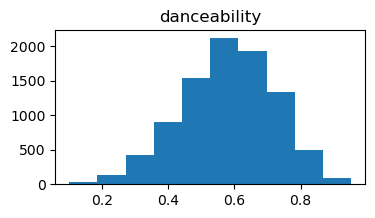

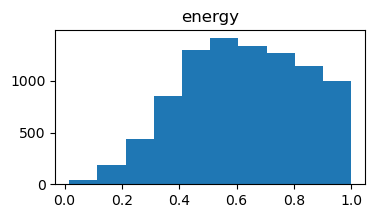

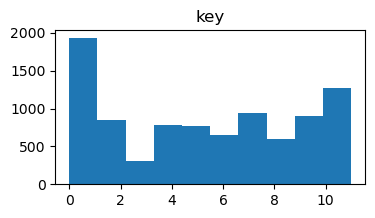

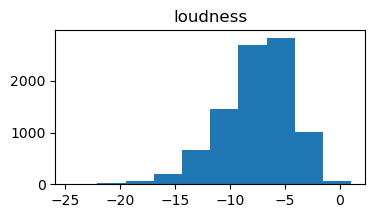

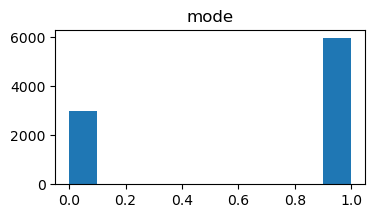

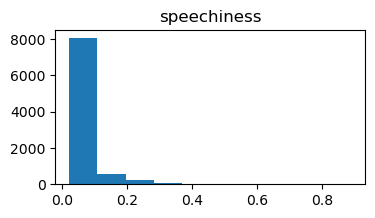

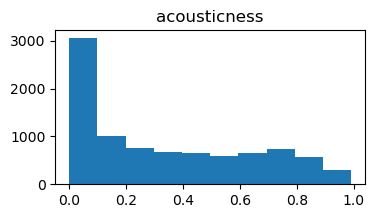

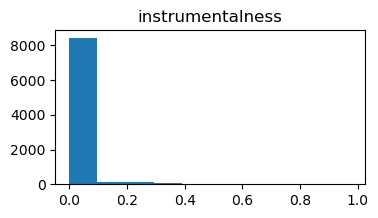

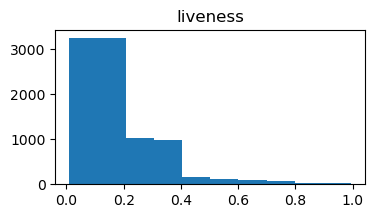

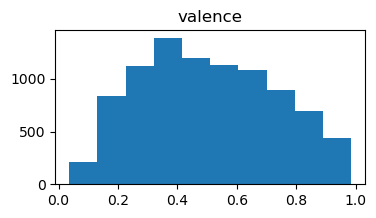

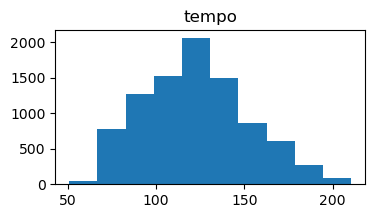

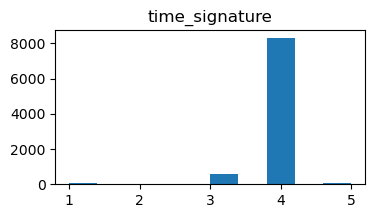

In [4]:
# plotting histograms for all columns in df_pop
for variable in df_pop:
    fig = plt.figure(figsize =(4, 2))
    plt.hist(df_pop[variable])
    plt.title(variable)
    plt.show()

As we visulize the variables from above, altough some features demonstrate a somewhere standard distribution, two variables 'mode' and 'time_signature' are not continuous varaibles but categorical variables. We remove those two variables since those categorical variables are not optimal for clustering with continuous variables.

In [5]:
df_pop = df_pop.drop(columns=['mode','time_signature'])

We created an PCA elbow graph to see the best number of principle components to use for our PCA. We will need to reduce the dimensions of our dataframe so we can use K-means clustering on it, otherwise there will be too many dimensions for K-means to work.

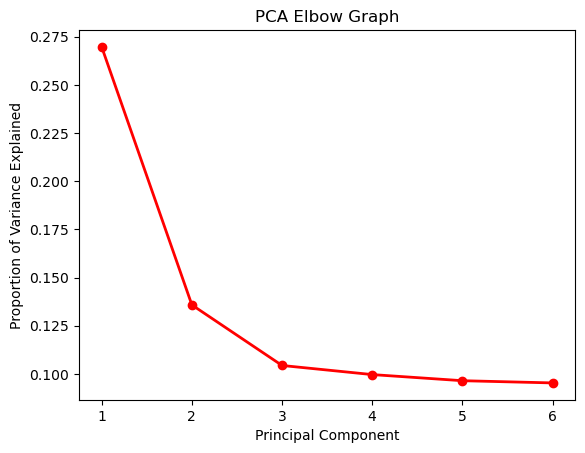

In [6]:
# normalizing the dataframe
normalized_df=(df_pop-df_pop.mean())/df_pop.std()

# using PCA from sklearn to plot the elbow graph
pca = PCA(n_components=6)
pcs = pca.fit_transform(normalized_df)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('PCA Elbow Graph')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [7]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(normalized_df)

We can see above that the best number of principle components is at 3 based on the graph. Therefore, we will be using 3 PCs from now on.
Similarly, we will also use t-sne as another method of dimension reduction since some models might run better on t-sne, hence we tuned the t-sne with a low perplexity parameter to focus on local structure with also n_components of 3.

In [8]:
# using TSNE from sklearn to perform dimensionality reduction on our original dataframe
tsne_perp_5 = TSNE(n_components=3, perplexity=5, random_state=99)
tcs = tsne_perp_5.fit_transform(normalized_df)
tcs = pd.DataFrame(tcs,columns=['c1','c2','c3'])

### Benchmark Model: KMeans Clustering

Now, we are going to plot our K-means graph after using PCA but first we need to find the best number of clusters to use. To do that, we will plot the elbow graph for our K-means first and see where the graph creates an elbow point.

/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

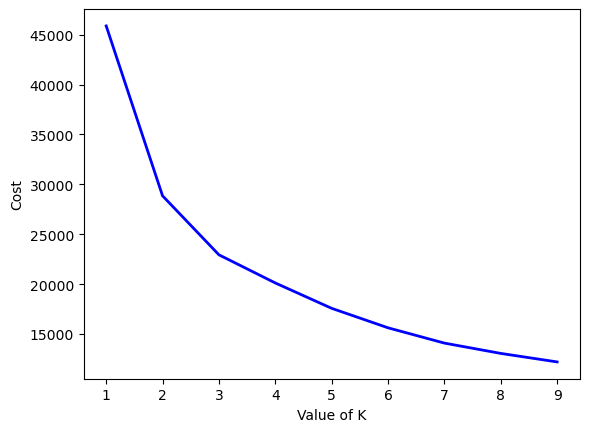

In [9]:
# using KMeans from sklearn to create an elbow graph
cost =[]
for i in range(1, 10):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(pcs)
    cost.append(KM.inertia_)     
 
# plotting the elbow graph
plt.plot(range(1, 10), cost, color ='b', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Cost")
plt.show() # clear the plot

Based on the elbow graph above, it is difficult to determining how many clusters we should use for our K-means clustering which indicates that PCA may not be the best dimensionality reduction tool to use. Luckily, we have another tool we can use instead: tsne.

We will re-graph our elbow graph after using tsne instead of PCA now.

/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

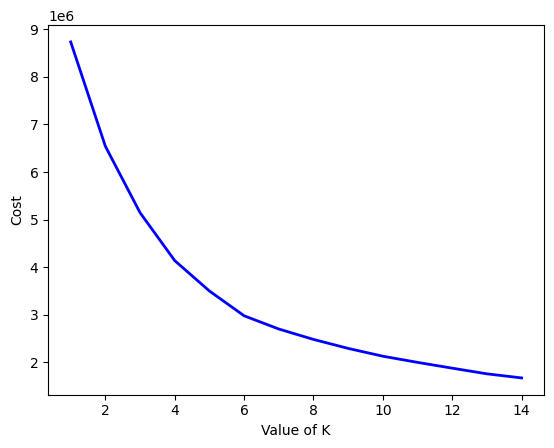

In [10]:
# using KMeans from sklearn to create an elbow graph
cost =[]
for i in range(1, 15):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(tcs)
    cost.append(KM.inertia_)     

# replotting our elbow graph after using tsne instead
plt.plot(range(1, 15), cost, color ='b', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Cost")
plt.show() # clear the plot

There is a clear point where our graph sharply stops decreasing at an exponential rate at 4. We will be using 4 clusters for our K-means now that we have used a better dimensionality reduction.

In [11]:
# using KMeans from sklearn to create 4 clusters
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(tcs)

/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


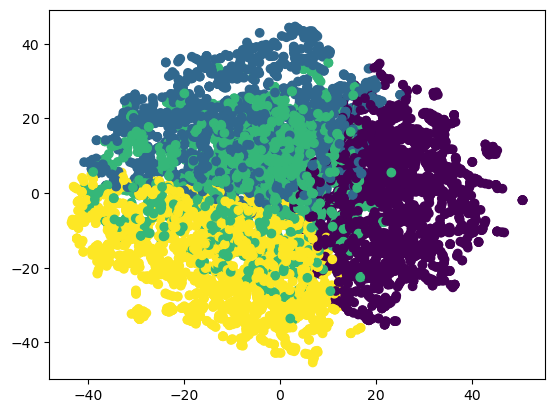

In [12]:
# plotting K-means of PCA
plt.scatter(tcs['c1'], tcs['c2'], c=label)

Now we can use our dataframe 'df_pop_indx' from earlier to find the album and track name of the songs in each cluster so it is easier for us to analyze how our songs are clustered.

In [13]:
# creating a new dataframe from our original 'df_pop_idx;
df_km = df_pop_idx

# creating a new column called 'Cluster' so we can find which song belongs to which cluster
df_km['Cluster'] = label.tolist()
df_km.head()

,album_name,track_name,Cluster
0,SABINA之淚,每次你走的時分,2
1,SABINA之淚,下了兩天雨,0
2,SABINA之淚,詩歌舞街,0
3,那陣時不知道,那陣時不知道,0
4,準備中,無條件,0


In [14]:
# exporting that list as a csv file for easier use
df_km.to_csv('k_means_result.csv')

Our K-means clustering appears to have been successful from the graph however, when we look at the songs in each cluster, we can see that the clusters are largely based on language rather than elements of the song such as danceability or instrumentals. This is because K-means needs an initial centroid first in order to form clusters. It iteratively finds the distance between a point and the initial centroid and keeps re-plotting the centroids until they are all positioned at the nearest spot for all the data points. Therefore, in order to accurately use K-means to cluster sub-genres, we would need previous knowledge of the cluster count and the dataset which is not possible with our research purposes. Thus, we need to explore other types of clustering algorithms to find the best sub-genre clustering algorithm.

### Spectral Clustering

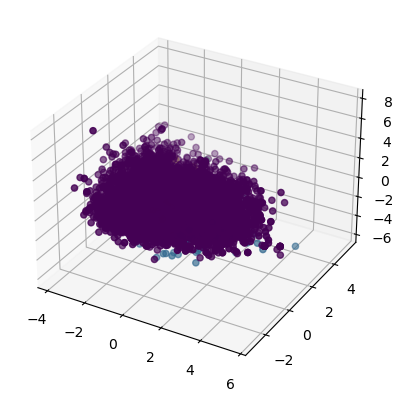

In [17]:
spectral_clustering = SpectralClustering(
    n_clusters= 4,  # Choose based on your data or domain knowledge
    affinity='rbf',
)

predicted_labels = spectral_clustering.fit_predict(pcs)

df_spec = pd.DataFrame(pcs, columns=['PC1', 'PC2','PC3'])
df_spec['Cluster'] = predicted_labels


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= pcs[:,0], ys=pcs[:,1],zs=pcs[:,2], c= predicted_labels)


In [18]:
# creating a new dataframe from our original 'df_pop_idx;
df_spectral = df_pop_idx

# creating a new column called 'Cluster' so we can find which song belongs to which cluster
df_spectral['Cluster'] = predicted_labels.tolist()
df_spectral.head()

,album_name,track_name,Cluster
0,SABINA之淚,每次你走的時分,0
1,SABINA之淚,下了兩天雨,0
2,SABINA之淚,詩歌舞街,0
3,那陣時不知道,那陣時不知道,0
4,準備中,無條件,0


In [19]:
df_spectral.to_csv('spectral_result.csv')

### Gaussian  Mixture Clustering

Best parameters: n_components is 6, covariance_type=full


Text(0.5, 0.92, 'Gaussian Mixture Model Clusters')

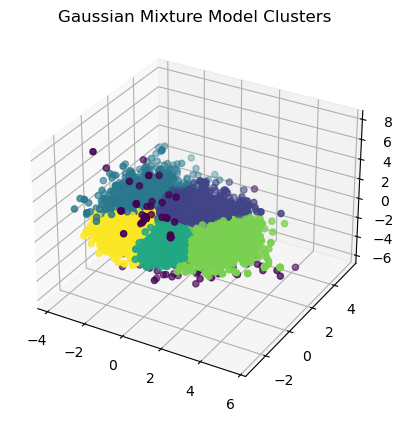

In [23]:


n_components_range = range(1, 7)
covariance_type_options = ["spherical", "tied", "diag", "full"]

bic_scores = []
parameters = []

for n_components in n_components_range:
    for covariance_type in covariance_type_options:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=0)
        gmm.fit(pcs)
        bic_scores.append(gmm.bic(pcs))
        parameters.append((n_components, covariance_type))

min_bic_index = np.argmin(bic_scores)
best_n_components, best_covariance_type = parameters[min_bic_index]

print(f"Best parameters: n_components is {best_n_components}, covariance_type={best_covariance_type}")

best_gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_covariance_type, random_state=0)
best_gmm.fit(pcs)
G_labels_pcs = best_gmm.predict(pcs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= pcs[:,0], ys=pcs[:,1],zs=pcs[:,2], c= G_labels)
plt.title('Gaussian Mixture Model Clusters')

Best parameters: n_components is 6, covariance_type=diag


Text(0.5, 0.92, 'Gaussian Mixture Model Clusters')

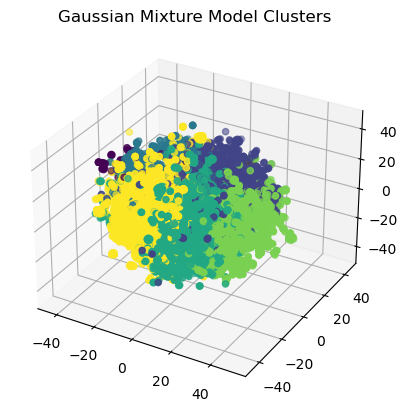

In [24]:
n_components_range = range(1, 7)
covariance_type_options = ["spherical", "tied", "diag", "full"]

bic_scores = []
parameters = []

for n_components in n_components_range:
    for covariance_type in covariance_type_options:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=0)
        gmm.fit(tcs)
        bic_scores.append(gmm.bic(tcs))
        parameters.append((n_components, covariance_type))

min_bic_index = np.argmin(bic_scores)
best_n_components, best_covariance_type = parameters[min_bic_index]

print(f"Best parameters: n_components is {best_n_components}, covariance_type={best_covariance_type}")

best_gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_covariance_type, random_state=0)
best_gmm.fit(tcs)
G_labels_tcs = best_gmm.predict(tcs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= tcs['c1'], ys=tcs['c2'],zs=tcs['c3'], c= G_labels)
plt.title('Gaussian Mixture Model Clusters')

In [26]:
df_ga = df_pop_idx
df_ga['Cluster'] = G_labels_tcs
df_ga.head()

,album_name,track_name,Cluster
0,SABINA之淚,每次你走的時分,3
1,SABINA之淚,下了兩天雨,4
2,SABINA之淚,詩歌舞街,4
3,那陣時不知道,那陣時不知道,4
4,準備中,無條件,4


In [27]:
df_ga.to_csv('Gaussian_result.csv')

### Hierarchical Clustering

Due to the underwhelming performance of Spectral Clustering and Gaussian Mixture Model, We will implement Hierarchical Clustering. Hierarchical Clustering requires no initialization and suppose to work well with smaller datasets. We also don't need to manipulate cluster groups parameter before running the model, hence we expect a better perfomance out of this algorithm.

In [30]:
def all_linkages(data):

    tree_sing = linkage(data,method='single')
    tree_cplt = linkage(data,method='complete')
    tree_avrg = linkage(data,method='average')
    tree_ward = linkage(data,method='ward')

    fig, axs = plt.subplots(2,2, figsize=(12,12))

    dendrogram(tree_sing, ax=axs[0,0])
    axs[0,0].set_title('Single linkage')
    xlim = axs[0,0].get_xlim()
    axs[0,0].set_yticks([])
    axs[0,0].set_xticks([])
    axs[0,0].set_xlim(xlim)


    dendrogram(tree_cplt, ax=axs[0,1])
    axs[0,1].set_title('Complete linkage')
    axs[0,1].set_yticks([])
    axs[0,1].set_xticks([])

    dendrogram(tree_avrg, ax=axs[1,0])
    axs[1,0].set_title('Average linkage')
    axs[1,0].set_yticks([])
    axs[1,0].set_xticks([])

    dendrogram(tree_ward, ax=axs[1,1])
    axs[1,1].set_title('Ward linkage');
    axs[1,1].set_yticks([])
    axs[1,1].set_xticks([])

    sns.despine(left=True, bottom=True)
    
    return tree_sing, tree_cplt, tree_avrg, tree_ward

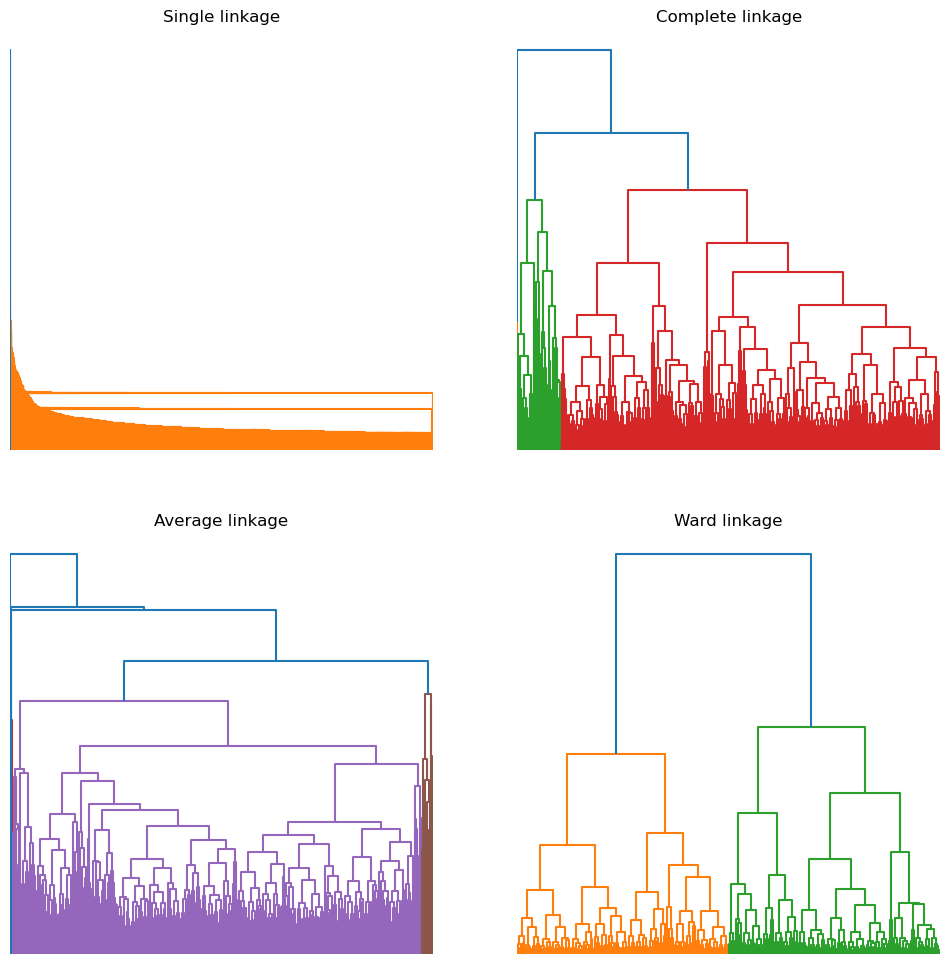

In [31]:
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(pcs)

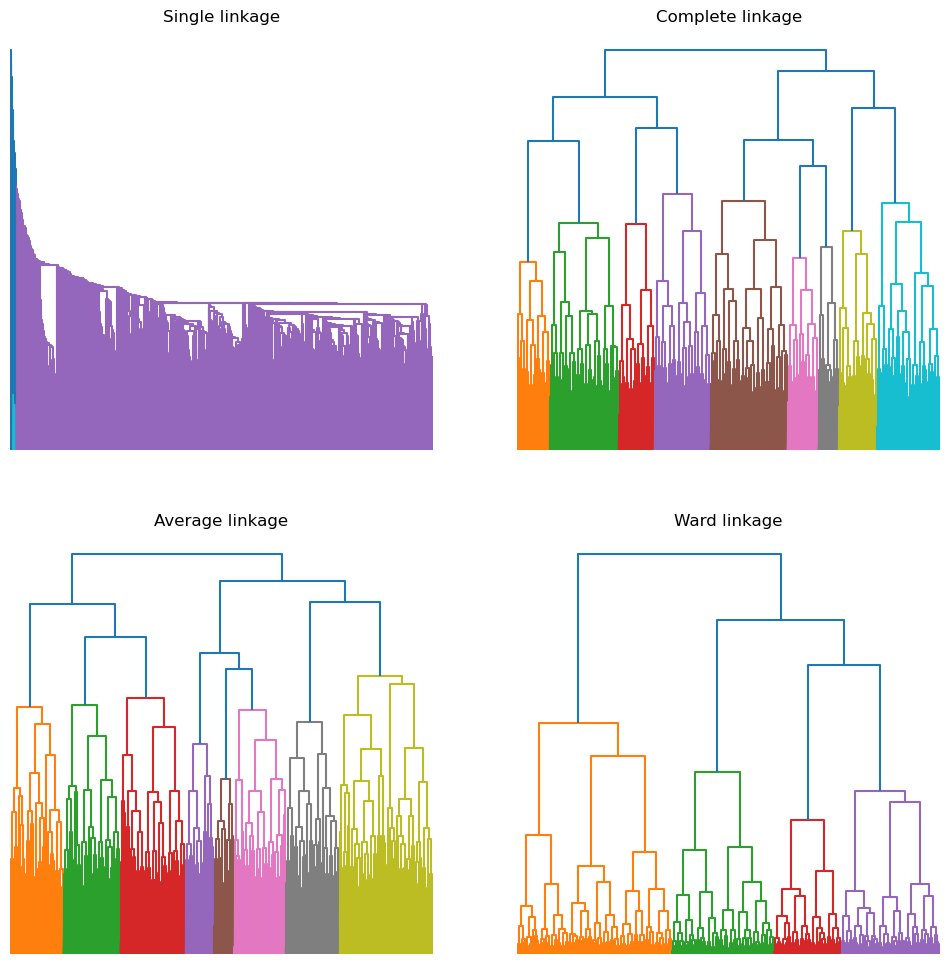

In [32]:
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(tcs)

We ran algorithm with four different linkage methods to visulize the most optimal method, and as we can see above, Ward linkage clearly is the most optimal one out of all four methods. Between pcs and tcs, pcs demosntrates a better clustering size while though tcs' Ward linkage also shows decent performance, the varaistion is noticebly bigger. PCS demonstrates two clear, similar size clusters that are comparable in width and height, hence we are going to implement Ward linkage for our algorithm from PCS.

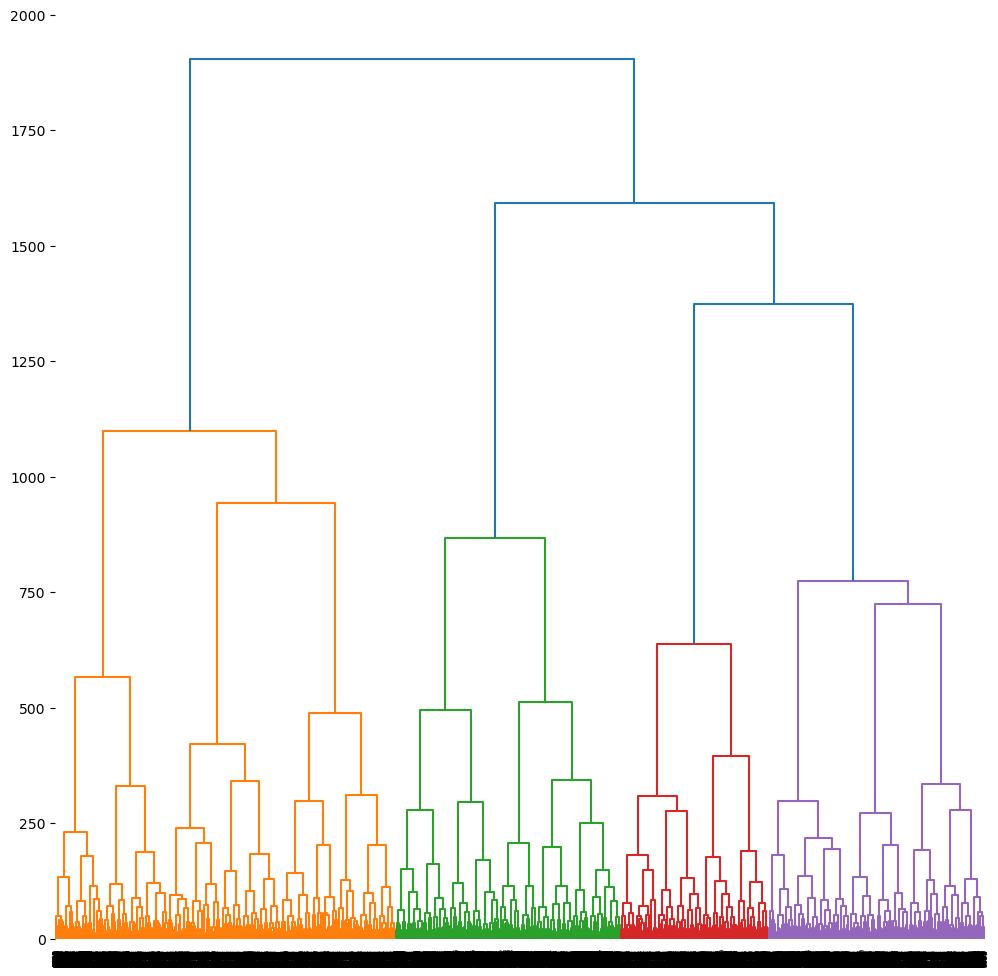

In [33]:
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

Lastly, we add the predicted cluster to our dataframe and export it to a csv file for evaulation.

In [34]:
clust = fcluster(tree_ward, criterion='distance', t=100) 
df_hierarchical = df_pop_idx
df_hierarchical['Cluster'] = clust.tolist()
df_hierarchical.head()

,album_name,track_name,Cluster
0,SABINA之淚,每次你走的時分,74
1,SABINA之淚,下了兩天雨,45
2,SABINA之淚,詩歌舞街,41
3,那陣時不知道,那陣時不知道,42
4,準備中,無條件,70


In [ ]:
df_hierarchical.to_csv('hierachical_result.csv')

Once again, we used our evaluation metrics to measure the peformance of the hierarchical clustering. The evaluation score to the hierarchical clustering is 8.8, which is higher than our benchmark model, and significantly higher than Spetral Clustering and Gaussian Mixture Model. The score aligns with our expectation.

# Discussion

### Interpreting the result

To find the most opitmal algorithm that can further categorify, we built a pipeline of dimension reduction and cluster algorithm, and we tuned the parameters for the best results. The biggest obstacle is that since all our data are similar enough already since they belong to the same category of music, the varaitions can be not significant enough to get drown out by the noises, hence if you look at our result, Hierarchical Clustering performed the best out of all models due to its unique attributes and its zero initialization requirement. Hierarchical Clustering gives the best visualizaion of clustering, which helps us determine the optimal number of clusters the best, therefore it was not suprising that it has the highest score based on our evaluation metrics. 

### Limitations

 Our research has explored many sub-genres of pop music however it is limited to only pop music. Our algorithm has only been trained with pop music so it would probably not fare well with other genres of music. It is easier to cluster data from one genre into multiple sub-genres because the data all belong under one category and mistakes are easier to fix. On the other hand, if we had clustered multiple genres into sub-genres, we would have a harder time differentiating the data and finding errors. If we had more time, we would have processed data from genres other than pop and train our algorithms to cluster multiple types of genres at once so it can be applied in real-world situations. For now, our study is only applicable to pop music and needs to be worked on more before we can release it to the world.

### Ethics & Privacy

The main goal of our project is to re-discover and make better classification of music genres for listeners having better experience. While we also seriously consider ethical and privacy aspects in our project.
1. Data privacy & consent: Since we use related data from Spotify. It may include sensitive musician and user information. We will make sure that all data is anonymous and used in compliance with data privacy and follows data protection laws, respecting both artist and listener privacy.
2. Bias and representation: Music data may also have bias(cultural, language, geographical position reasons, etc) We know that initial dataset may not represent all music genres equitably (particularly those from underrepresented regions or languages).We will minimize and mitigate such biases,  try our best to make a diversified and inclusive music environment.
3. Generalization and Impact: our project dataset is limited, but we want to seek methods to generalize the results in various music genres. We will pay attention to avoid overgeneralization which may misrepresent some music styles, working towards recommendations that benefit a broad spectrum of listeners and musicians.
4. Transparency and accountability: considering ethical research practices, we promise that our methodologies, data sources, and findings are all transparent. 

### Conclusion

In our project, we aim to develop a machine learning model that accurately categorizes pop music into various sub-genres, thereby providing users with more accurate music recommendations. Through an in-depth comparison of traditional K-Means Clustering, Hierarchical Clustering, GMM, and Spectral Clustering, we found that hierarchical clustering has significant advantages in dealing with the fine-grained segmentation of pop music. This model allows us to flexibly recognize and group fine-grained music segments without determining the number of clusters in advance.

Our research reveals the limitations of traditional music recommendation systems that tend to roughly categorize music into broad genres while ignoring rich sub-genres. Our model emphasizes the importance of considering subgenres in music recommendation, which helps break the echo-chamber effect of users' music choices and increases the chances of discovering new music.

By comparing hierarchical clustering, GMM, and spectral clustering, we conclude that while GMM and spectral clustering perform well in some cases, Hierarchical Clustering is more effective in combining flexibility, accuracy, and explanatory properties. In particular, hierarchical clustering demonstrates its unique advantages when dealing with datasets with complex structures and multiple lookalike genres.

In summary, our project succeeded in increasing the level of detail and personalization of music recommendation systems, presenting users with a broader and more specific selection of music. Future work could explore hybrid models that combine these clustering techniques to further improve the performance and accuracy of recommendation systems.

# Footnotes
<a name="sternNote"></a>1.[^](#stern): Stern, Samuel Walter, "Analysis of Music Genre Clustering Algorithms" (2021). Theses and Dissertations. 2839. https://dc.uwm.edu/cgi/viewcontent.cgi?article=3844&context=etd <br> 
<a name="mystery"></a>2.[^](#mys): Uncovering the Mystery: Why is Spotify's Algorithm Failing to Impress?, 
locall.host/why-is-spotify-algorithm-so-bad/.
<br>

